In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [48]:
def black_scholes(S, K, T, r, sigma, q=0, option_type='c'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'c':
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'p':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return 0

In [49]:
S = 100
K = 120
T = 1.0
sigma = 0.3
r = 0.04
q = 0.01

In [50]:
num_sims = 1_000_000
days = 252    # Trading days in a year
dt = T / days   # Daily time intervals
dt_sqrt = np.sqrt(dt)

In [51]:
def call_payoff(S, K):
    return np.maximum(S - K, 0)

def put_payoff(S, K):
    return np.maximum(K - S, 0)

In [52]:
paths = np.zeros((num_sims, days+1))
paths[:, 0] = S     # Initial condition
paths.shape

(1000000, 253)

In [ ]:
for n in range(1, days+1):
    dW = np.random.standard_normal(num_sims) * dt_sqrt
    paths[:, n] = paths[:, n-1] * np.exp((r - q - 0.5 * sigma**2) * dt + sigma * dW)

In [54]:
ST = paths[:, -1]
call_payoffs = call_payoff(ST, K)
put_payoffs = put_payoff(ST, K)
call_payoffs.shape, put_payoffs.shape

((1000000,), (1000000,))

In [55]:
call_price = np.average(call_payoffs) * np.exp(-r * T)
put_price = np.average(put_payoffs) * np.exp(-r * T)
call_price, put_price

(6.222384704190164, 22.512665220732796)

In [56]:
black_scholes_call_price = black_scholes(S, K, T, r, sigma, q=q, option_type='c')
black_scholes_put_price = black_scholes(S, K, T, r, sigma, q=q, option_type='p')
black_scholes_call_price, black_scholes_put_price

(6.22761058909953, 22.5173599124615)

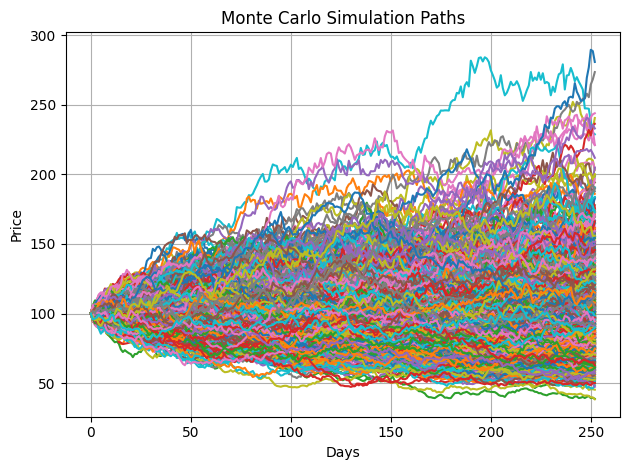

In [58]:
for i in range(1_000):
    plt.plot(paths[i], label=f'Path {i+1}')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation Paths')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/monte-carlo.jpg', dpi=300)
plt.show()